<a href="https://colab.research.google.com/github/PurvanshBarodia/Backorder-Prediction/blob/main/Backorder_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title** : Backorder Prediction

**Technologies** : Machine Learning Technology

**Domain** : Ecommerce

**Project Difficulties level** : Intermediate


*Terms:*

**Backorder**: 
This are the order which company can not fullfill at a preset.

It results in delayed delevery of the product which actully result into customer's in unsetisfaction that eventually result into lose of customer.

We are living in the times where compnies are devloping habit of inpesence form the model like delevery in 15 minute.

watch video for more explaination: https://tinyurl.com/33sd3nwv

**ERP**:
Enterprice Resource Planning

watch video for more explaination: https://tinyurl.com/2p833d2e

**Problem Statement:**

Backorders are unavoidable, but by anticipating which things will be backordered, planning can be streamlined at several levels, **preventing unexpected strain on production, logistics, and transportation.** ERP systems generate a lot of data (mainly structured) and also contain a lot of historical data; if this data can be properly utilized, a predictive model to forecast backorders and plan accordingly can be constructed. **Based on past data from inventories, supply chain, and sales, classify the products as going into backorder (Yes or No).**

**Dataset:**

Link: https://tinyurl.com/2au43psv

In [1]:
## Step:0 Import all neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Step:1 Get the Dataset

from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive

train_df = pd.read_csv('Back-order Prediction/Kaggle_Training_Dataset_v2.csv')
test_df = pd.read_csv('Back-order Prediction/Kaggle_Test_Dataset_v2.csv')

Mounted at /content/gdrive
/content/gdrive/MyDrive


<ipython-input-2-8792dcd47f9a>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('Back-order Prediction/Kaggle_Training_Dataset_v2.csv')
<ipython-input-2-8792dcd47f9a>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('Back-order Prediction/Kaggle_Test_Dataset_v2.csv')


In [3]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [5]:
# Step 2 Clean the Data (Train and Test)

train_df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [6]:
# lead_time have 100894 null values, so it is better to impute with median value
train_df.loc[train_df['lead_time'].isnull(),'lead_time'] = train_df['lead_time'].median()

In [7]:
train_df.isnull().sum()

sku                  0
national_inv         1
lead_time            0
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
potential_issue      1
pieces_past_due      1
perf_6_month_avg     1
perf_12_month_avg    1
local_bo_qty         1
deck_risk            1
oe_constraint        1
ppap_risk            1
stop_auto_buy        1
rev_stop             1
went_on_backorder    1
dtype: int64

In [8]:
# drop other null vaules
train_df.dropna(inplace=True)

In [9]:
# sku is Product ID so which is of no use
# drop the column sku
train_df.drop('sku',axis=1,inplace=True)

In [10]:
for i in train_df.columns:
  print(i)
  print(train_df[i].value_counts())
  print("__________________________________________________")

national_inv
 0.0        108425
 2.0        107869
 3.0         90577
 4.0         69588
 5.0         58916
             ...  
 8928.0          1
 14216.0         1
 8153.0          1
 59796.0         1
-208.0           1
Name: national_inv, Length: 14969, dtype: int64
__________________________________________________
lead_time
8.0     783079
2.0     337402
12.0    199700
4.0     128537
9.0     123649
52.0     30113
3.0      16253
10.0     14192
0.0      10511
14.0     10314
16.0      8843
13.0      5405
6.0       5365
5.0       4031
15.0      3812
17.0      3763
11.0      1094
20.0       416
30.0       312
18.0       221
7.0        209
22.0       133
24.0       115
26.0       105
28.0        84
21.0        49
40.0        48
35.0        35
19.0        28
1.0         21
23.0        14
25.0         7
Name: lead_time, dtype: int64
__________________________________________________
in_transit_qty
0.0        1344662
1.0          36515
2.0          22236
3.0          17189
4.0          1536

In [11]:
# However we have treated all values which was stored ans NaN,
# But as we see above, in some columns it is noted as -99.00 (perf_6_month_avg, perf_12_month_avg)

# Let's see what percentage of data having -99.0 value
l_col = ['perf_6_month_avg','perf_12_month_avg']
(train_df[ l_col] == -99.0).sum() / train_df.shape[0]

perf_6_month_avg     0.076711
perf_12_month_avg    0.072310
dtype: float64

In [12]:
# In both column 0.07% data is -99.0
# We can drop the values as we will not lose much data
drop_index = train_df.loc[train_df['perf_6_month_avg'] == -99.0,:].index
train_df.drop(drop_index,axis=0,inplace=True)

drop_index = train_df.loc[train_df['perf_12_month_avg'] == -99.0,:].index
train_df.drop(drop_index,axis=0,inplace=True)

In [13]:
(train_df[ l_col] == -99.0).sum()

perf_6_month_avg     0
perf_12_month_avg    0
dtype: int64

In [14]:
(train_df.dtypes =='object')

national_inv         False
lead_time            False
in_transit_qty       False
forecast_3_month     False
forecast_6_month     False
forecast_9_month     False
sales_1_month        False
sales_3_month        False
sales_6_month        False
sales_9_month        False
min_bank             False
potential_issue       True
pieces_past_due      False
perf_6_month_avg     False
perf_12_month_avg    False
local_bo_qty         False
deck_risk             True
oe_constraint         True
ppap_risk             True
stop_auto_buy         True
rev_stop              True
went_on_backorder     True
dtype: bool

In [15]:
# As we can see there are 8 columns having datatype object.
# Which all are binary type
binary_col = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
               'stop_auto_buy', 'rev_stop', 'went_on_backorder']
train_df[binary_col]



,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,No,No,No,No,Yes,No,No
3,No,No,No,No,Yes,No,No
5,No,No,No,No,Yes,No,No
7,No,Yes,No,Yes,Yes,No,No
9,No,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...
1687854,No,No,No,No,Yes,No,No
1687855,No,Yes,No,No,Yes,No,No
1687857,No,Yes,No,No,No,No,Yes
1687858,No,No,No,No,Yes,No,No


In [16]:
# This 7 columns have Binary (Yes/No) values, convert it to 0,1
# Apply conditional mask on this df columns
# convert it to int type (True will be evaluate to 1 and False will be evalute to 0)
train_df[binary_col] = (train_df[binary_col]=='Yes').astype('int64')

In [17]:
# Now all the values are numeric
# normalize the remaining columns
norm_col = list(set(train_df.columns) - set(binary_col))
#train_df[norm_col]
from sklearn.preprocessing import normalize

train_df[norm_col] = normalize(train_df[norm_col],axis=1)

In [18]:
train_df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,0.214472,0.965122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.106163,0.106163,0.000000,0,0,0,1,0,0
3,0.655533,0.749180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.009365,0.012174,0.000000,0,0,0,1,0,0
5,0.849058,0.522497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.053556,0.056822,0.000000,0,0,0,1,0,0
7,0.948683,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1,0,1,1,0,0
9,0.443271,0.886543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.090871,0.096412,0.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687854,0.058667,0.003785,0.066237,0.193979,0.369034,0.586669,0.060559,0.219528,0.401679,0.508131,...,0.0,0.000402,0.000426,0.000473,0,0,0,1,0,0
1687855,0.000000,0.093973,0.000000,0.469866,0.469866,0.469866,0.000000,0.234933,0.328906,0.328906,...,0.0,0.032421,0.032421,0.234933,1,0,0,1,0,0
1687857,-0.038795,0.349151,0.000000,0.271562,0.349151,0.426740,0.000000,0.310356,0.426740,0.465534,...,0.0,0.033363,0.032587,0.038795,1,0,0,0,0,1
1687858,0.196104,0.028467,0.050607,0.123356,0.275178,0.398534,0.110704,0.199267,0.483934,0.648408,...,0.0,0.002720,0.002657,0.018978,0,0,0,1,0,0


In [19]:
# save it as cleaned_train.csv
train_df.to_csv('cleaned_train.csv',index=None)

In [20]:
# Do the same Process for Test data
test_df.loc[test_df['lead_time'].isnull(),'lead_time'] = test_df['lead_time'].median()


# drop other null vaules
test_df.dropna(inplace=True)


# sku is Product ID so which is of no use
# drop the column sku
test_df.drop('sku',axis=1,inplace=True)


drop_index = test_df.loc[test_df['perf_6_month_avg'] == -99.0,:].index
test_df.drop(drop_index,axis=0,inplace=True)


drop_index = test_df.loc[test_df['perf_12_month_avg'] == -99.0,:].index
test_df.drop(drop_index,axis=0,inplace=True)


# There are 8 columns having datatype object.
# Which all are binary type
binary_col = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
               'stop_auto_buy', 'rev_stop', 'went_on_backorder']




# This 7 columns have Binary (Yes/No) values, convert it to 0,1
# Apply conditional mask on this df columns
# convert it to int type (True will be evaluate to 1 and False will be evalute to 0)
test_df[binary_col] = (test_df[binary_col]=='Yes').astype('int64')


# Now all the values are numeric
# normalize the remaining columns
norm_col = list(set(test_df.columns) - set(binary_col))
#test_df[norm_col]
from sklearn.preprocessing import normalize


test_df[norm_col] = normalize(test_df[norm_col],axis=1)


# save it as cleaned_test.csv
test_df.to_csv('cleaned_test.csv',index=None)

In [21]:
t = pd.read_csv('cleaned_test.csv')
t.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.902586,0.424746,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.048846,0.050439,0.0,0,0,0,1,0,0
1,0.947784,0.210619,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.210619,...,0.0,0.082141,0.078982,0.0,0,0,1,1,0,0
2,0.241129,0.964516,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.065105,0.085601,0.0,0,0,0,1,0,0
3,0.979327,0.130577,0.0,0.0,0.0,0.0,0.0,0.0,0.065288,0.130577,...,0.0,0.024157,0.044396,0.0,0,0,0,1,0,0
4,0.997045,0.076696,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.003164,0.003068,0.0,0,0,0,1,0,0


In [22]:
# Step:3 Start working on Clean Data

In [23]:
import pandas as pd
train_1 = pd.read_csv('cleaned_train.csv')
test_1 = pd.read_csv('cleaned_test.csv')

In [24]:
train_1.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.214472,0.965122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.106163,0.106163,0.0,0,0,0,1,0,0
1,0.655533,0.749180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.009365,0.012174,0.0,0,0,0,1,0,0
2,0.849058,0.522497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.053556,0.056822,0.0,0,0,0,1,0,0
3,0.948683,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,1,0,1,1,0,0
4,0.443271,0.886543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.090871,0.096412,0.0,0,0,0,1,0,0


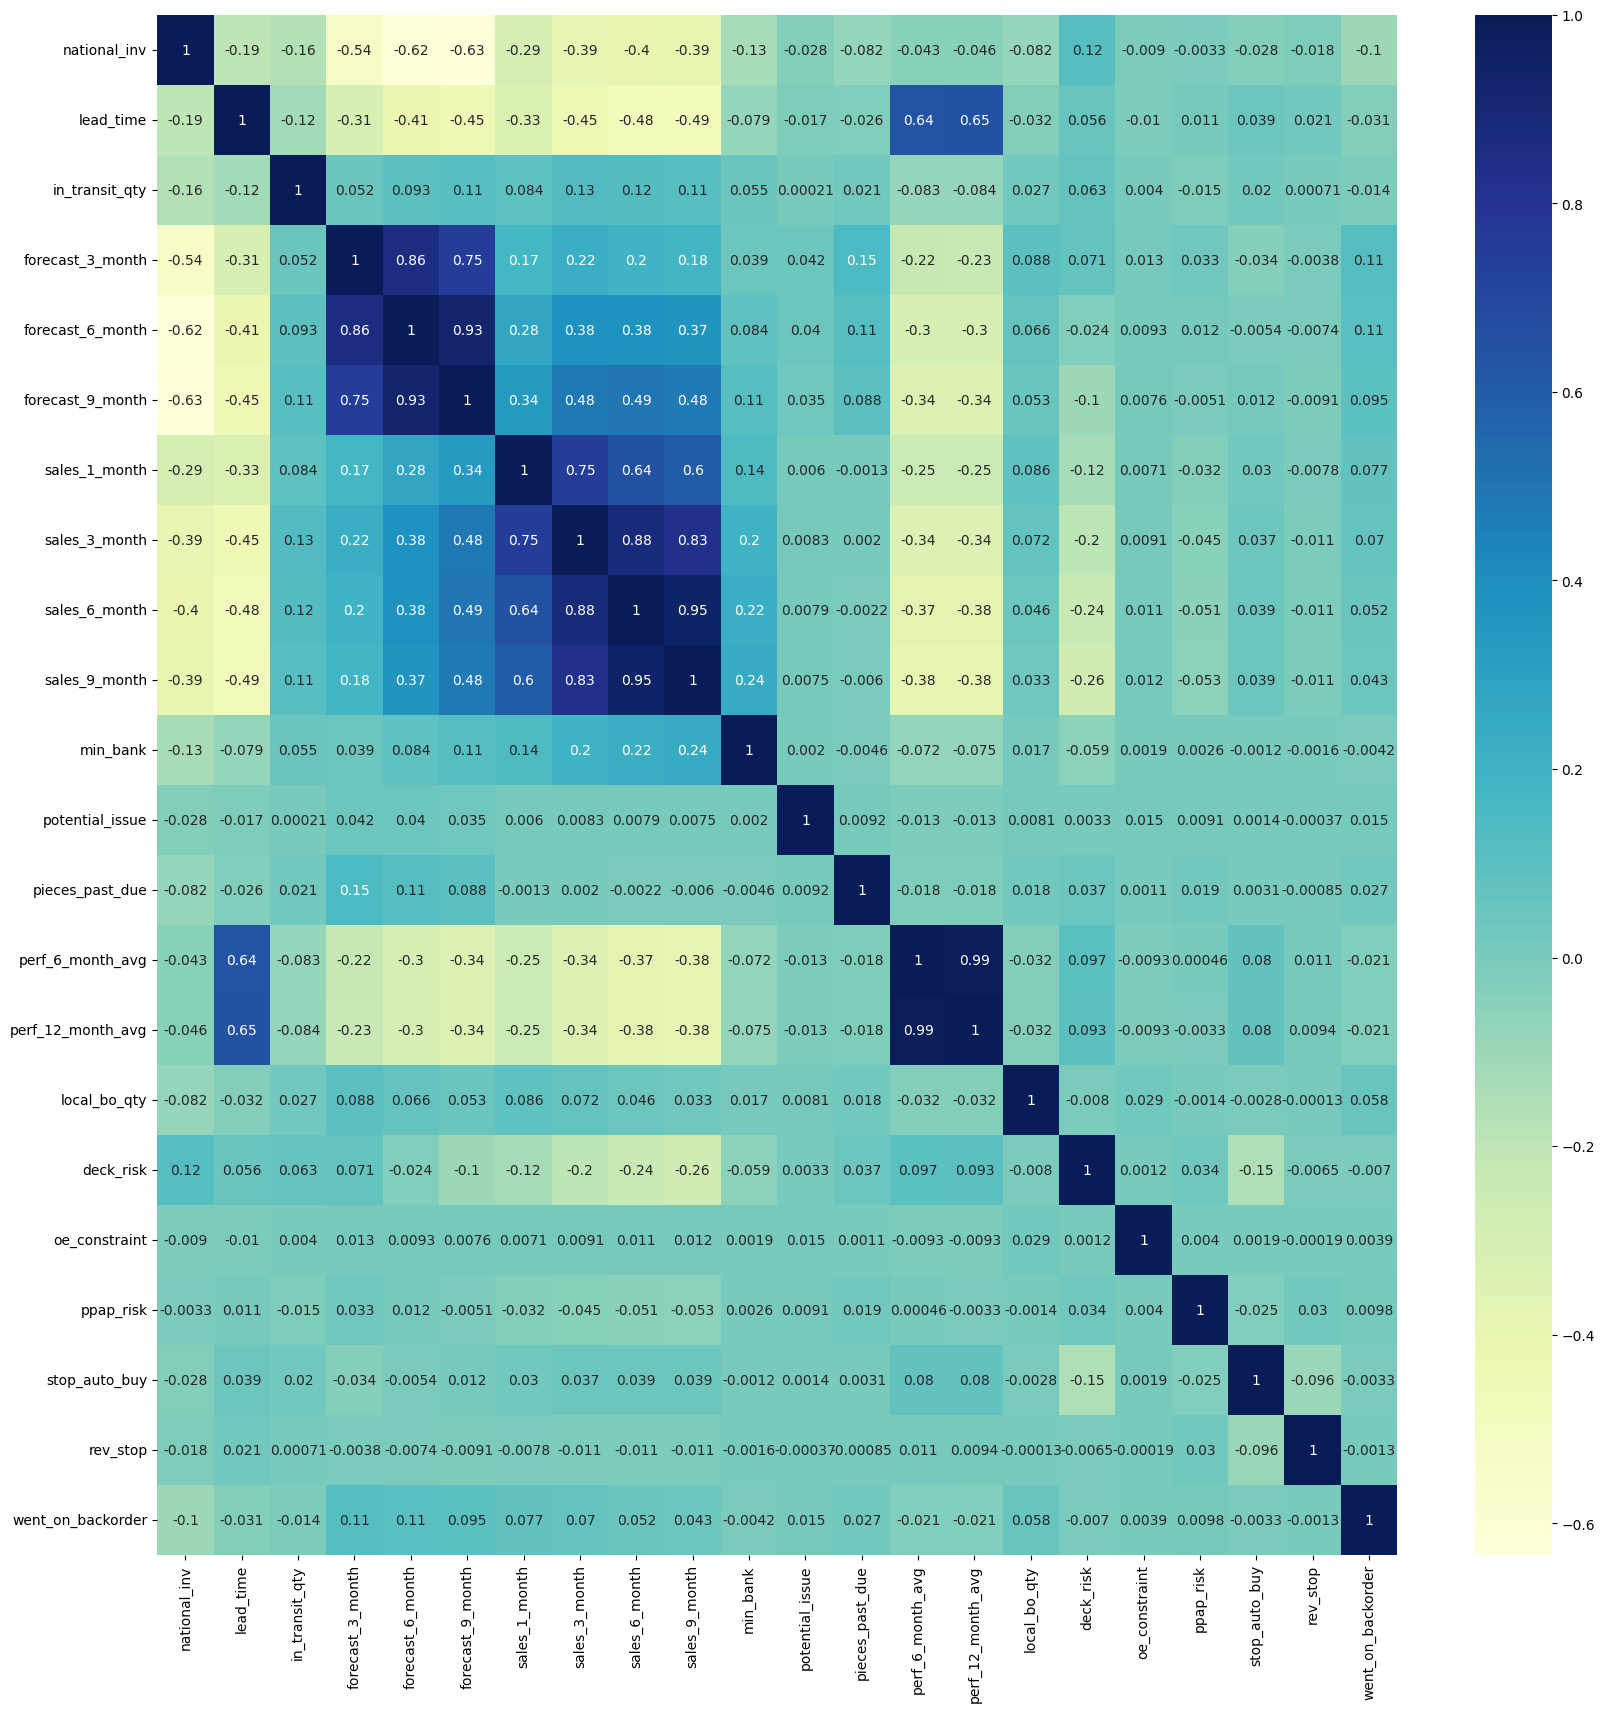

In [25]:
# Let's see the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(train_1.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [26]:
# Not any variable is highly correlated with the predictor variable "went_on_backorder"

# However all the forecast (3,6,9 months), sales (1,3,6,9 months) and pref avg (6,12) are highly correlated with each other.
# It seems logical to combine them but, this variable can containe some business understanding that might be get lost.

# for now let's keep all the variables and build a model, 
# then we will performe:

# feature selection (selecting subset of original features) and 
# feature extraction (transforming the original features into a lower-dimensional space. PCA/LDA/t-SNE)

In [27]:
# Model -1
# Build a simple logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix,accuracy_score

# Here, train - test are alreday in seprate df
# if it was not, you need to perforem train_test_split:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = train_1.drop('went_on_backorder',axis=1)
y_train = train_1['went_on_backorder']

X_test = test_1.drop('went_on_backorder',axis=1)
y_test = test_1['went_on_backorder']

# Create logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9884156897216716


In [28]:
# we got 98% accuracy that mean this is very good model?

# No, if you look closely there is a class imbalance problem 
# Accuracy is not a good performance metric for class imbalance problems 
# because it only considers the overall correctness of the model's predictions, 
# without taking into account the distribution of the classes in the dataset.

In [29]:
# Let's print roc_auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("ROC_AUC:",roc_auc)

ROC_AUC: 0.5001496378080249


In [30]:
# AUC score is 0.5 that means it is very bad classification
# Because it is same as randomly assigning lables to the data points.

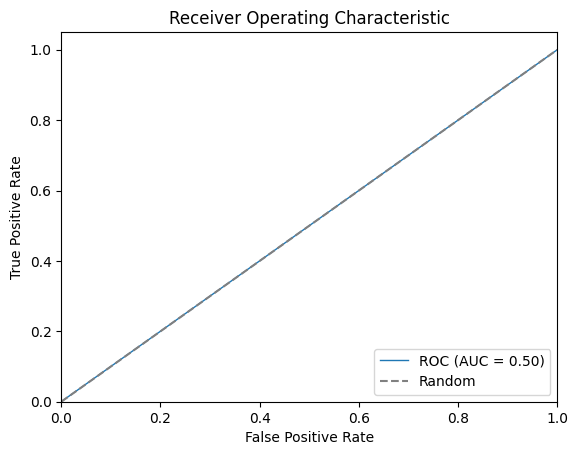

In [31]:
# Plot ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

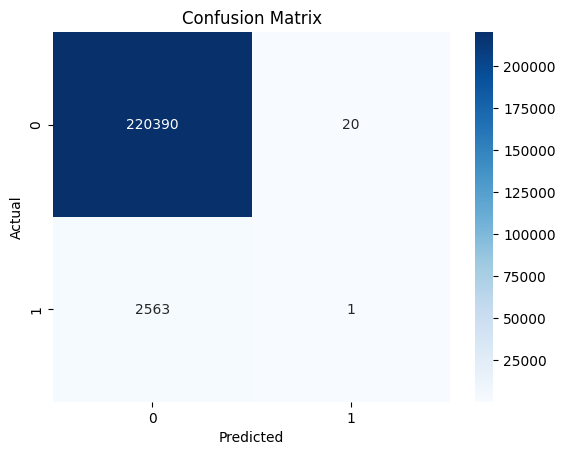

In [32]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Here, we can see why it is the case.
# There is a problem of class imbalance.

In [34]:
# Step - 4
# Handling Class imbalance through SMOTE

# What is SMOTE ?

# SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique for oversampling the minority class in imbalanced datasets. 
# The SMOTE algorithm works by generating synthetic samples for the minority class by interpolating between existing minority class samples.

# https://tinyurl.com/3a6brh4j


In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
# Oversample the minority class using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7963036049046077


In [37]:
# Let's print roc_auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("ROC_AUC:",roc_auc)

ROC_AUC: 0.827388128463753


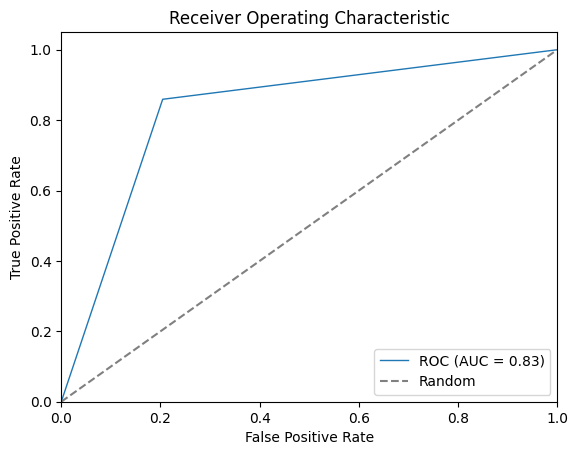

In [38]:
# Plot ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

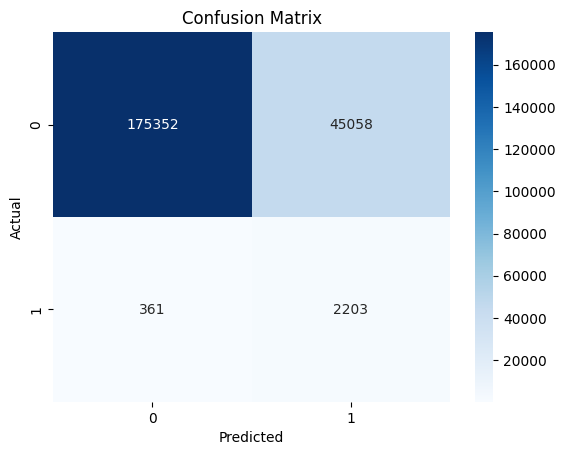

In [39]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# However over accuracy is decreased,by seeing the confusion matrix
# we are quite sure that the model is leaning about class 1, which was not the case while working on imbalnaced data.

In [ ]:
# Step - 5

# Try Different Classification Algorithms and Compeare it with base model (simple logistic regression)

In [41]:
# Step - 6

# Deploy the Model

In [ ]:
# I will add codes for step5 and 6 as soon as I get time.